# T1.2 Descriptive Statistics

# (1) Summary Statistics

Problem statment:

Given a dataset X:

* Characterize the distribution in one or two values
* Characterization should be robust, i.e. not severly affected by single outliers

Equivalent of an elevator pitch for a data sets.


## The Mean Value

The _mean value_ of $X=[x_1, \dots, x_n]$ is defined as

$$ \mu = mean(X) = \frac{1}{n} \sum_{i=1}^n x_i. $$

- Represnets center of mass
- If the values are close together this is a good representative
- Can be easily affected by outliers

In [2]:
# Computation of the mean value

def mean(X):
    return float(sum(X)) / len(X)

## Medians

A _median value_ for $x_1, \dots, x_n$ is number $m$ such that
  
 $$ \# \{ i \,|\, x_i \lt m \} = \# \{ i \,|\, x_i \gt m \}. $$

So the number of samples smaller than $m$ is equal to the number of samples larger than $m$.
(Both should be roughly $n/2$).
  
Remark:

* A Median always exists
* Median is not always unique
* Very robust to outliers
* Less "precise" then the mean for well behaved datasets

# The central median

Medians can be computed by sorting the dataset.

`S = sorted(X)`

Consider the following cases:

- if `len(X)` is odd, then `S[(len(X)-1)/2]` is the (unique and) central median.
- if `len(X)` is even, then all values between `S[len(X)/2-1]` and `S[len(X)/2]` are median values.  
  The central median is defined as the mean of those two values.

We write $median(X)$ for the central median of $X$.

Example:
* `median([1,2,3]) = 2`
* `median([1,2]) = (1 + 2) / 2`

In [3]:
# Computation of the median
def median_range(X):
    S = sorted(X)
    n = len(X)
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (S[lower_mid], S[upper_mid])

def median(X):
    a,b = median_range(X)
    return (a+b)/2

In [4]:
def plot_median_range(X):
    plt.figure(figsize=(14,1))
    a, b = median_range(X)
    c = (a+b)/2.
    sns.rugplot(X, color="green", height=0.5)
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([c,c],[0.5,1],'r-')
    plt.plot([a,b],[0.5,0.5],'r--')
    plt.title("Median Range: {:.3f} .. {:,.3f}".format(a,b))
    plt.ylim([0,1])

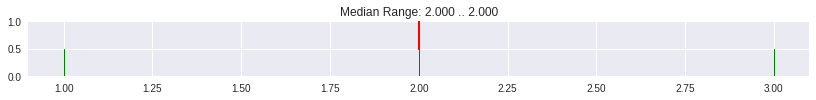

In [5]:
plot_median_range([1,2,3])

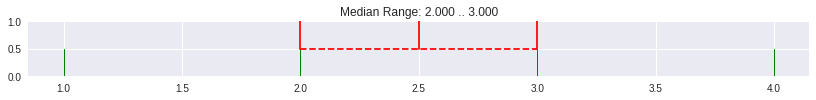

In [6]:
plot_median_range([1,2,3,4])

# Truncated Means

* Truncated means "interpolate" between means and medianse.
* In many cases they provid the increased "precision" of means, while keeping the robustnes against outliers.

To arrive at the k-truncated mean of a dataset X, perform the following steps:
* Remove a minimum and a maximum value from X, a total of k times.
* The remaining samples are called the k-truncation of X and denoted by $T_k X$.
* Caculate the mean value of the remaining samples.

We deonte the k-truncated mean by `tmean(X,k)`.

In [7]:
def tmean(X,k):
    X = list(X)
    k = int(k)
    if len(X) <= 2*k:
        return None
    for i in range(k):
        X.remove(max(X))
        X.remove(min(X))
    return mean(X)

In [9]:
# Truncated mean examples
print(tmean([1,2,3,5,100],0))
print(tmean([1,2,3,5,100],1))
print(tmean([1,2,3,5,100],2))

22.2
3.3333333333333335
3.0


In [11]:
# Plot
def mark(m,height=1,style='r'):
    plt.plot([m,m],[0,height],style)

def plot_mean_median(X):
    plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey', height=0.5)
    mark(mean(X));                     print("mean:        {:4.2f} (red)".format(mean(X)))
    k = int(math.ceil(10*len(X)/100.))
    mark(tmean(X,k), style='b');       print("tmean(X,{:2}): {:4.2f} (blue)".format(k,tmean(X,k)))
    mark(median(X), style='g');        print("median:      {:4.2f} (green)".format(median(X)))
    plt.show()

mean:        0.07 (red)
tmean(X,50): 0.06 (blue)
median:      -0.02 (green)


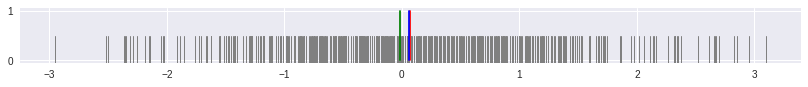

mean:        1316.31 (red)
tmean(X, 8): 1315.61 (blue)
median:      1399.66 (green)


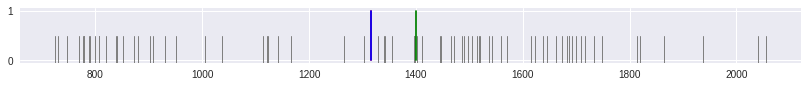

mean:        45.77 (red)
tmean(X,10): 30.52 (blue)
median:      29.10 (green)


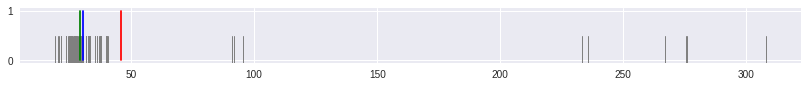

In [12]:
# Normally distributed data
Z = [ np.random.normal() for x in range(500) ]
plot_mean_median(Z)

# Mean value of some request rates
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
plot_mean_median(X)

# Request Latency Dataset
Y = np.genfromtxt("DataSets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
plot_mean_median(Y[0:100])

mean:        41.60 (red)
tmean(X, 1): 35.00 (blue)
median:      3.00 (green)


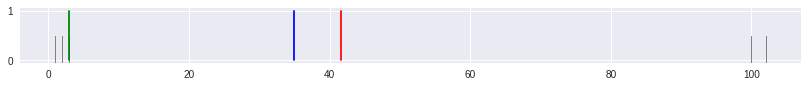

In [13]:
# Mean values can be atypical
plot_mean_median([1,2,3,100,102])

# (2) Deviation Measures

Goal measure "typical" deviation form a central value.

1. The _maximal deviation_ is defined as

   $$ maxdev(X) = max \{ |X[i] - \mu| \,|\, i=1,\dots,n\}.$$

2. The _mean absolute deviation_ is defined as
   
   $$ mad(X) = \frac{1}{n} \sum_{i=1}^n |X[i] - \mu|.$$

3. The _standard deviation_ is defined as

   $$ \sigma(X) = stddev(X) =  \sqrt{\frac{1}{n} \sum_{i=1}^n (X[i] - \mu)^2}.$$

4. The _inter quartile range_ is defined as difference of the 75- and 25-Percentile:

   $$ IQR(X) = P(75,X) - P(25,X) $$

Properties:
* Measure the 'typical' displacement from the mean value.
* Standard deviation is popular because it has extremely nice mathematical properties.
* The IQR is very robust to outliers.

In [63]:
def max_dev(X):
    m = mean(X)
    return max(abs(x - m) for x in X)

def mad(X):
    m = mean(X)
    return sum(abs(x - m) for x in X) / float(len(X))

def stddev(X):
    m = mean(X)
    return math.pow(sum((x - m)**2 for x in X) / len(X), 0.5)

def IQR(X): return percentile(75,X) - percentile(0.25,X)

# computation of percentiles is given below

In [64]:
# Plotting helper function
def plot_mean_dev(X, m, s, new_canvas=True):
    print("center    = ", m)
    print("deviation = ", s)
    if new_canvas: plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey', height=0.5)
    plt.plot([m,m],[0,1],'r-' )
    plt.plot([m-s,m-s],[0,1],'b-')
    plt.plot([m+s,m+s],[0,1],'b-')
    plt.plot([m-s,m+s],[0.5,0.5],'b--')
    if new_canvas: plt.show()

Maximal deviation
center    =  0.07213720245746086
deviation =  3.021629123562713


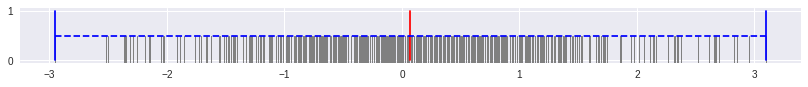

Standard Deviation
center    =  0.07213720245746086
deviation =  1.0595775620223


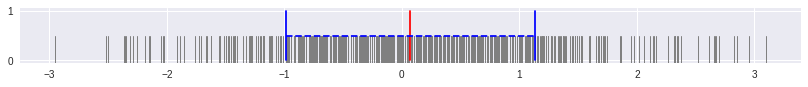

Mean Absolute Deviation
center    =  0.07213720245746086
deviation =  0.8422310359180026


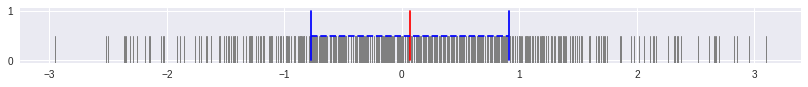

Median IQR
center    =  -0.015214586986014082
deviation =  1.7648272988759945


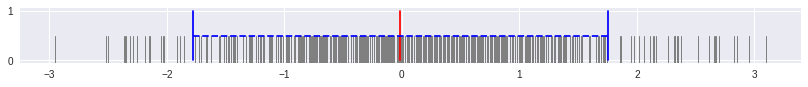

In [65]:
# Standard deviation is a good deviation for normal distributed data

print("Maximal deviation")
plot_mean_dev(Z,mean(Z),max_dev(Z))

print("Standard Deviation")
plot_mean_dev(Z,mean(Z),stddev(Z))

print("Mean Absolute Deviation")
plot_mean_dev(Z,mean(Z),mad(Z))

print("Median IQR")
plot_mean_dev(Z,median(Z),IQR(Z)/2)

Maximal deviation
center    =  1316.3086347078017
deviation =  738.072957089


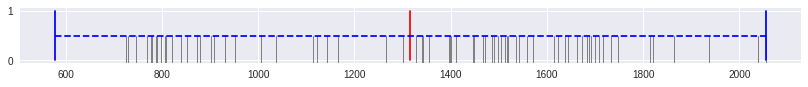

Standard Deviation
center    =  1316.3086347078017
deviation =  374.5723639541368


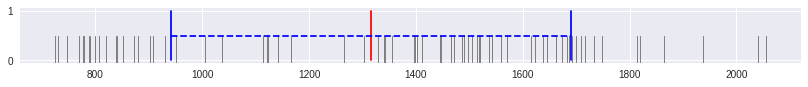

Mean Absolute Deviation
center    =  1316.3086347078017
deviation =  327.4656915


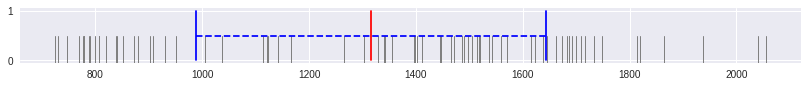

Mean Median IQR
center    =  1399.66320801
deviation =  452.709228516


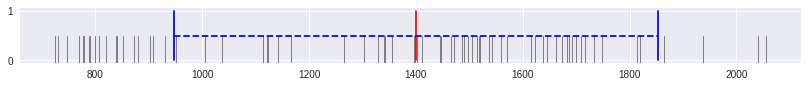

In [23]:
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
    
print("Maximal deviation")
plot_mean_dev(X,mean(X),max_dev(X))

print("Standard Deviation")
plot_mean_dev(X,mean(X),stddev(X))

print("Mean Absolute Deviation")
plot_mean_dev(X,mean(X),mad(X))

print("Mean Median IQR")
plot_mean_dev(X,median(X),IQR(X)/2)

Maximal deviation
center    =  61.35899999999999
deviation =  1161.641


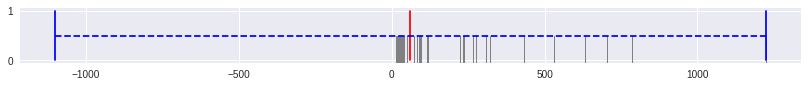

Standard Deviation
center    =  61.35899999999999
deviation =  133.49686932284217


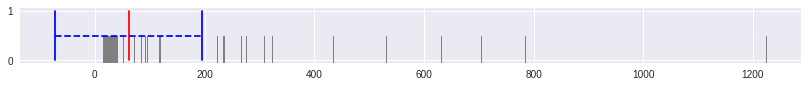

Mean Absolute Deviation
center    =  61.35899999999999
deviation =  59.90502


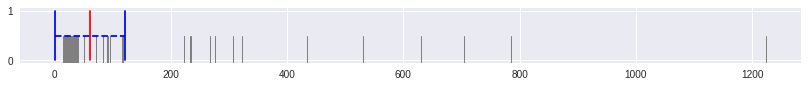

Mean Median IQR
center    =  27.2
deviation =  10.4


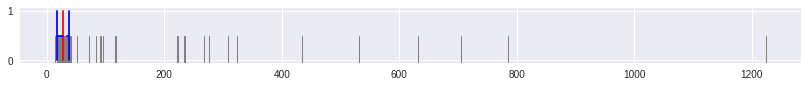

In [66]:
print("Maximal deviation")
plot_mean_dev(Y,mean(Y),max_dev(Y))

print("Standard Deviation")
plot_mean_dev(Y,mean(Y),stddev(Y))

print("Mean Absolute Deviation")
plot_mean_dev(Y,mean(Y),mad(Y))

print("Mean Median IQR")
plot_mean_dev(Y,median(Y),IQR(Y)/2)

## Caution with Standard Deviation

- Everybody Learns about standard deviation in school
- Beautiful mathematical properties!
- Everybody knows 
  - "68% of data falls within 1 std-dev of the mean"
  - "95% falls within 2 std-dev of the mean"
  - "99.7" falls within 3 std-dev of the mean"
* "Problem is: this is utter nonsense". Only true for normally distributed data.

* Not good for measuring outliers!


_Source:_ Janert - Data Analysis with Open Source Tools

## War Story:

- Looking at SLA for DB response times
- Outlier defined as value larger than $\mu + 3\sigma$
- Look at code: Takes '0.3' percentile!
- So always have outliers.
- And 0.3-percentile was way too large (hours of latency).
- Programmer changed code for 1%, 5%, 10% quantiles.
- Finally handcoded a threshold
- The SLA was never changed

Source: Janert - Data Analysis with Open Source Tools

# Tukey's outlier Definition

A k-outlier is a data point X which is either

* larger than `P(75) + k * IQR(X)` or
* smaller than `P(25) - k * IQR(X)`.

An outlier (without k) is an 1.5-outlier.

In [25]:
def outliers(X, k=1.5):
    iqr = IQR(X)
    lower_bound = percentile(25,X) - k * iqr
    upper_bound = percentile(75,X) + k * iqr
    out = []
    for x in X:
        if x < lower_bound: out.append(x)
        if x > upper_bound: out.append(x)
    return out

In [27]:
def outlier_plot(X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color="green", height=0.5)
    a,b = percentile(25,X), percentile(75,X)
    O = outliers(X)
    print("IQR:", b-a)
    print("Outlier count:", len(O))
    mark_range(a,b)
    for o in O:
        plt.plot([o,o],[0.7,0.8],'b--')
    plt.ylim([0,1])

IQR: 1.3889625559552572
Outlier count: 0


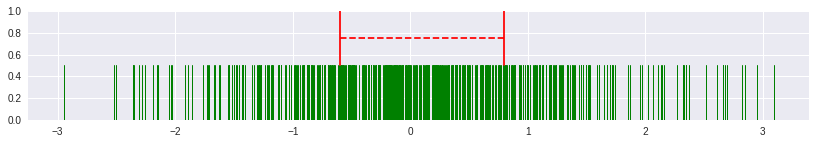

In [35]:
# Normal Data
outlier_plot(Z)

IQR: 725.891693115
Outlier count: 0


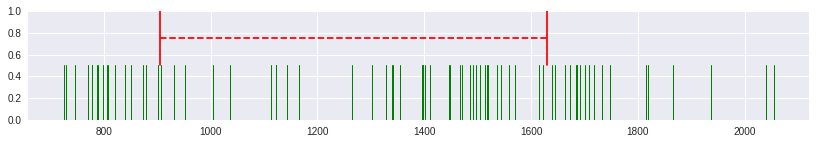

In [36]:
# Web request Rates
outlier_plot(X)

IQR: 9.0
Outlier count: 43


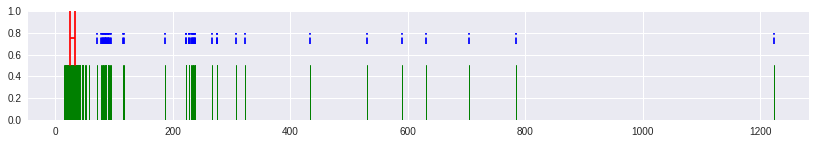

In [37]:
# Request Latencies
outlier_plot(Y)

# Tukey's Boxplots

Show:

* Median
* Box around 0.25 and 0.75 Quantiles
* "whiskers" from min to max
* points for outliers

Allows visual clues:

* Where is the data concentracted?
* How far is it spread?
* How skew is the data?

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


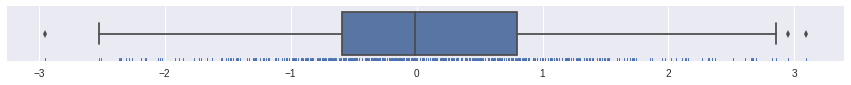

In [38]:
# Normal Data
plt.figure(figsize=(15,1))
sns.boxplot(x=Z, vert=False)
sns.rugplot(Z)
plt.show()

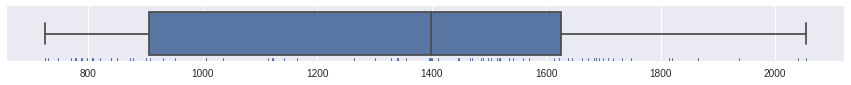

In [39]:
# Tukey Boxplots show outliers as 'points' outside the whiskers

# Web-request dataset
plt.figure(figsize=(15,1))
sns.boxplot(x=X)
sns.rugplot(X)
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


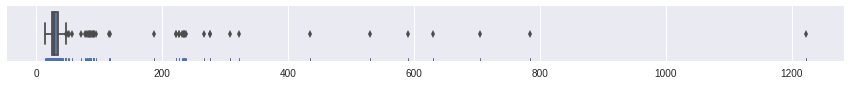

In [40]:
# Latency Dataset
plt.figure(figsize=(15,1))
sns.boxplot(x=Y, vert=False)
sns.rugplot(Y)
plt.show()

Demo:
- Global duration percentiles with Overlays: [demo](https://demo-hh2.circonus.com/trending/graphs/view/9e85beb8-4658-49f5-95e8-b6cf70ad5ca9#set-YVlpVTrN)
- Latency percentiles in CAQL [demo](https://demo-hh2.circonus.com/trending/graphs/edit/da4ac22a-55b9-6145-abbc-a0371919e876)

# Outlier Scores

The intuitive meaning of outlier is a value in a dataset, that is "unlikely" to be generated by the same process as the rest of the distribution.

A simple outlier score:

* Pick a summary statistic $M$: E.g. mean
* Pick a deviation measure $D$: E.g. MAD

The outlier score of a value $x$ in context $X$ is defined as:

$$OutlierScore(X,y) = \frac{M(X) - y}{S(X)}$$

It measures how many deviations a sample is away from the mean.

* Good for well behaved datasets with a single mode
* Problematic for skew distributions
* Easy to use in practice

Demo:
- Outlier Detection in Time Series https://demo-hh2.circonus.com/trending/graphs/view/c7602466-69f4-e6b3-ceae-95049da417c4
- Time range: August 30th - September 7th 2015

## Takeaway

* Don't use the standard-deviation if you can avoid it
* If you need a deviation measure use MAD or IQR:
  - (+) Simple to calculate
  - (+) Simple to interpret
  - (-) Not mergable

# (3) Measuring Distributions

* Classical summary statistics good for describing the body of the distribution
* Need information about the tail of the distributions, e.g. for writing good SLAs
* Determine outliers in a dataset

## Inverse Percentiles

The inverse percentile y of a dataset $X$, is defined as:

$$ IP(y, X) = \text{(the percentage of samples in X that are lower than $y$)} = \# \{ i \, | \, x_i \leq y \} / \# X \cdot 100 $$

**Properties**

* $0 \leq IP(y, X) \leq 100$, dimensionless percentage value
* $IP(y,X)$ is monotonically increasing in $y$

In [ ]:
def IP(y,X):
    lower_count = 0
    for x in X:
        if x <= y: lower_count += 1
    return float(lower_count) / len(X)

In [ ]:
# Example
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,5)
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]

grid = np.linspace(0,3000,100)
plt.figure(figsize=(20,5))
plt.plot(grid, [IP(y,X) for y in grid])
plt.title("Inverse Percentiles")
sns.rugplot(X)

# Percentiles

* Complement or Inverse to Inverse Percentiles:
  - IP: The ratio of samples was below a value $y$ was $?\%$
  - Percentile: 90% of all queries where faster than $?$

* The definition is a little involved so cover examples first

Examples:

* The minimum is a 0%-percentile
* A median is a 50%-percentile
* The maximum is a 100%-percentile
* Quartiles: $0,25,50,75,100$-percentiles
* Quantiles: The $r$-quantile is the $r*100$-percentile $0<r<1$.

# General Definition of Percentiles

Pick a number $0\leq p \leq 100$. A $p$%-percentile for $X$ is a value $y$ such that,

$$ \#\{i \,|\, X[i] \lt y \} \leq \frac{p}{100} \cdot n $$

and

$$ \#\{i \,|\, X[i] \gt y \} \leq \frac{100-p}{100} \cdot n $$

Roughly speaking, $y$ divides $X$ in $p\%$ samples that are lower than $y$ and $(100-p)\%$ samples that are larger than $y$.

Remarks:

* Quantiles always exists
* Non unique (like median)
* Lot's of ways to choose a quantile function, i.e. interpolate between $s_a$ and $s_b$ cf.  
  http://en.wikipedia.org/wiki/Quantile#Estimating_the_quantiles_of_a_population

In [41]:
# Computation of Quantiles
def percentile_range(p,X):
    q = p/100.0
    S = sorted(X)
    n = len(X)
    upper_d = int(math.ceil(q * (n + 1)))
    lower_d = int(math.floor(q * (n + 1)))
    # edge cases
    if upper_d == 0:   upper_d = 1
    if upper_d == n+1: upper_d = n
    if lower_d == 0:   lower_d = 1
    if lower_d == n+1: lower_d = n
    return (S[lower_d-1], S[upper_d-1])

def percentile(p,X):
    a,b = percentile_range(p,X)
    return (a+b)/2 # mid point percentile. One choice!

In [42]:
def mark_range(a,b):
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([a,b],[0.75,0.75],'r--')

def plot_percentile_range(p,X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color="green", height=0.5)
    a,b = percentile_range(p,X)
    mark_range(a,b)
    plt.title("{:n}%-Percentile Range: {:.3f} .. {:,.3f}".format(p, a,b))
    plt.ylim([0,1])

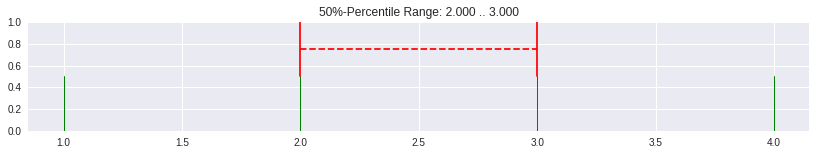

In [43]:
plot_percentile_range(50,[1,2,3,4])

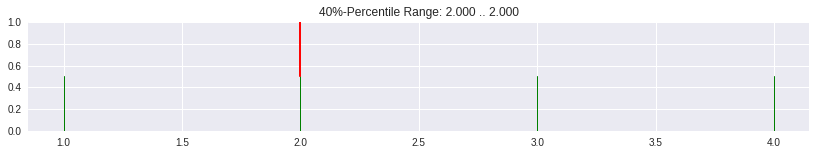

In [44]:
plot_percentile_range(40,[1,2,3,4])

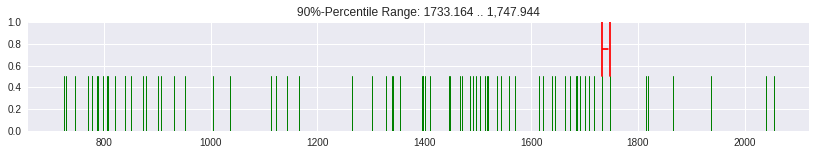

In [45]:
plot_percentile_range(90,X)

# Percentiles can't be Aggregated

https://twitter.com/heinrichhartman/status/748562001392111617